# Lab Eight - CLaSP 405 - 002 - Space Weather Part 2

## *Bootstrap Analysis*

### Adam Benson

Lab Objectives: 

- Perform bootstrap analysis (or resampling). 
- Set up a boostrap analysis problem. 
- Analyze bootstrap outputs. 
- Plot bootstrap analysis results. 
- Basics of object oriented plotting (optional). 


Additional materials for reading: 

- Lecture Notes - Lectures 7 & 8 & 9
- Igual & Seguí Chapter 4 for discussion in 4.3.1.3 of resampling. 
- For programming tips and object orientied see the online [Python Textbook](http://python-textbok.readthedocs.io/en/1.0/Introduction.html) and [Python Documentation](https://docs.python.org/3/tutorial/classes.html).

Gratitude to [Doga Ozturk](http://clasp.engin.umich.edu/people/dcsoztrk/GSTUDENT) and [Yeimy Rivera](http://clasp.engin.umich.edu/people/yrivera/GSTUDENT) for their assistance in discussions on space weather and data access. 


### Part A: Space Weather Review 


"Space-weather events are naturally occurring phenomena that have the potential to disrupt electric power systems; satellite, aircraft, and spacecraft operations; telecommunications; position, navigation, and timing services; and other technologies and infrastructures..." Source - [National Space Weather Action Plan](https://obamawhitehouse.archives.gov/sites/default/files/microsites/ostp/final_nationalspaceweatheractionplan_20151028.pdf)

"Space weather refers to the environmental conditions in Earth's magnetosphere (e.g. magnetic environment), ionosphere and thermosphere (e.g. upper atmosphere) due to the Sun and the solar wind that can influence the functioning and reliability of spaceborne and ground-based systems and services or endanger property or human health." Source - [European Space Agency](http://swe.ssa.esa.int/what-is-space-weather)

<img src="./Images/SpaceWeatherNOAA.jpg" alt="SpaceWeatherInfographic" width="800px"/>

Source: [NOAA](http://www.noaa.gov/explainers/space-weather-storms-from-sun)

----

### Part B: Bootstrap Method

In this lab we will continue using space weather data but implement the bootstrap method we learned about in Lecture 8. 

The bootstrap method is where you repeatedly resample a dataset with replacement, ie you can have repeat values, to gain an estimation of error. 


<img src="./Images/ExampleBootstrap.png" alt="ExampleBootstrapImage" height="400px" width="350px"/>



## *Part 1 - Brief Intro to Object Oriented Programming With Solar Cycle Data*

Let's take a look again at the solar cycle information we had from before. This time we are going to see a new way to plot. We've been using object oriented programming so far in this class, but in a very "see it and then copy it" way. This is a great way to start with object oriented and in effect you are ready to learn it more explicitly.

We are showing you this because it can be a very efficent and effective way to code (and useful when Googling for coding help in the future after you are done with this course)

In [1]:
#import required modules 

import numpy as np                              #for accuracy 
import datetime as dt                           #for datetime objects
import matplotlib.pyplot as plt                 #for pretty plotting
import pandas as pd                             #for data structures
from   scipy import stats                       #for linear regression
import matplotlib.dates as mdt                  #for manipulation of dates in matplotlib
from   matplotlib.ticker import MultipleLocator #for pretty plotting
import importlib                                #for reimporting libaries / package
import linerror as lr                           #same as Lab6 - for calculating linear fits
import externalfunctions as extFunc             #same as Lab7 - for importing
from scipy.stats import skew, kurtosis, norm    #same as in Lab5 - for normal dist. stats

import omni                                     #NEW IN THIS LAB - example
                                                #object oriented instance of omni class
import bootstrap                                #NEW IN THIS LAB - collection
                                                #of functions to calculate bootstrap
#for plotting in notebook
%matplotlib inline

In [2]:
import os

### Part A. Introduction to Object Oriented 

In [3]:


#download daily, hourly, and monthly resolution data

hourlyOmni = extFunc.loadOmniData('./Data/omni2_Hourly1980_2018.lst')
dailyOmni = extFunc.loadOmniData('./Data/omni2_Daily1980_2018.lst')
monthlyOmni = extFunc.loadOmniData('./Data/omni2_27day1980_2018.lst')

#this is the data we were using last lecture

#This data is from the OMNI site - https://omniweb.gsfc.nasa.gov/html/ow_data.html#1

#"primarily a 1963-to-current compilation of hourly-averaged, near-Earth solar 
#wind magnetic field and plasma parameter data from several spacecraft in geocentric or 
#L1 (Lagrange point) orbits. The data have been extensively cross compared, and, 
#for some spacecraft and parameters, cross-normalized. Time-shifts of higher 
#resolution data to expected magnetosphere-arrival times are done for data from 
#spacecraft in L1 orbits (ISEE 3, Wind, ACE), prior to taking hourly averages."

So far we've seen object oriented programming at work with Pandas dataframes and other types of data structures (numpy ndarrays, dictionaries etc). 

We have used the following in our work: 

- Classes
    - A way to bundle data and functions. Creating a type of class creates an "object". 
- Objects
    - In Python everything is an object and every object is an "instance" of a class. 
- Methods
    - These are functions that "belong" to a class. 
- Attributes
    - These are data that "belong" to a class. 

You likely saw these words as you found errors as you wrote up your homework :). You commonly run into these when you try to do something that can not be done to an "object" of a certain type. Let's see this in action. 

In [4]:
# looking at shape
(hourlyOmni.shape)

(334488, 13)

In [5]:
# summary statistics
hourlyOmni.describe()

,BX,BY,BZ,FlowPressure,Ey,Kp,SunspotNumber,Dst,f10.7_index
count,268555.000000,268555.000000,268555.000000,263181.000000,262023.000000,334224.000000,333864.000000,334488.000000,334320.000000
mean,-0.019519,0.056917,0.005324,2.267442,-0.000908,21.304763,88.439508,-15.400672,122.316683
std,3.740846,4.185922,3.048880,1.943178,1.485015,14.329952,78.070713,23.138020,51.311150
min,-40.800000,-33.000000,-53.700000,0.000000,-36.110000,0.000000,0.000000,-589.000000,64.600000
25%,-2.800000,-2.700000,-1.400000,1.230000,-0.660000,10.000000,22.000000,-24.000000,77.900000
50%,-0.100000,0.000000,0.000000,1.800000,-0.000000,20.000000,69.000000,-11.000000,106.700000
75%,2.700000,2.700000,1.400000,2.680000,0.660000,30.000000,138.000000,-1.000000,154.800000
max,34.800000,46.100000,37.500000,79.050000,47.110000,90.000000,410.000000,81.000000,359.200000


### So far we've used all these before. We are just calling them different things now to be more accurate as we move forward. 

### Part B. Introduction to Object Oriented Concepts

In general there are three ideas we use in our object-oriented programming. 
- Encapsulation. 
    - This is the hallmark of object oriented. Grouping data, and functions, together as objects or "encapsulating" them. This means that programming can now be objects that you can access, do things with, not just a list.  
- Inheritance. 
    - A trickle down hierarchy of data types. Allows a data type to aquire (inherit) the properties of another. 
        - A real world example - beets are a vegetable, vegetables are food, vegetables are edible, therefore, a beet is edible.  
- Polymorphism. 
    - You can use the same interface, for different types/classes. This allows for functions to use different types at different times. 
        - A real world example - the steering wheel. 
            - If you have different types of steering wheels in cars, power steering, manual steering, etc you would expect to use them all to drive a car the same way. 

### Part C. Putting it Together - Object Oriented Creation Example

Let's give this a shot - and see how this works if we want to make our OWN classes. 

In [6]:
class Bird():
    '''
    Creating a class called Bird - note classes first letter is in caps.
    '''
    
    #create a method for this class
    #note the syntax where self is in the function - ie 
    #the function ACTS on itself. 
    def fly(self):
        print('The bird is out to fly.')

In [7]:
#create an instance of the class Bird
testBird = Bird()

In [8]:
help(Bird)

Help on class Bird in module __main__:

class Bird(builtins.object)
 |  Creating a class called Bird - note classes first letter is in caps.
 |  
 |  Methods defined here:
 |  
 |  fly(self)
 |      #create a method for this class
 |      #note the syntax where self is in the function - ie 
 |      #the function ACTS on itself.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



In [9]:

#use the method fly
testBird.fly()

The bird is out to fly.


In [10]:
class Bird():
    '''
    Creating a class called Bird - note classes first letter is in caps.
    '''
    
    #what if we want to initialize with some attributes?
    def __init__(self, species = 'Nothing Yet'):
        self.species = species
        
    #create a method for this class
    #note the syntax where self is in the function - ie 
    #the function ACTS on itself. 
    def fly(self):
        print('The {} is out to fly.'.format(self.species))

In [11]:
#now when we try this -
testBird = Bird()
#and acess that attribute - 
print(testBird.species)

Nothing Yet


In [12]:
print(testBird.fly())

The Nothing Yet is out to fly.
None


In [13]:
#now when we try this -
testBird = Bird(species = 'Eagle')
#and acess that attribute - 
print(testBird.species)


Eagle


In [14]:
#and access the method
testBird.fly()

The Eagle is out to fly.


### Part D. How to Plot with Object Oriented. 

So far we've used plotting in a very object oriented way - IE this is pretty much the same. There are some short cuts that you can implement but the below code is exactly the same as in Lab 7, but now you can start to see where we've been using object-oriented -

(25, 400)

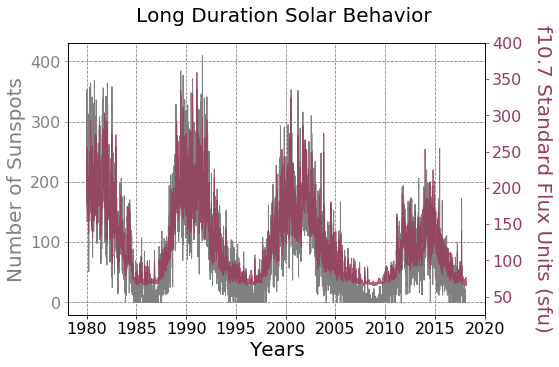

In [15]:
#We made this chart in Lab 7 -  this a chart of the long term solar cycle. 

#Create an instance of a matplotlib figure class - 
fig = plt.figure(figsize=(8, 5))

#set the title
fig.suptitle('Long Duration Solar Behavior', fontsize=20)

#Create an instance of a matplotlib gridspec class
gs  = plt.GridSpec(1, 1, hspace=0.0, wspace=0.2, right = 0.85)

#add subplots - adds an instance of a subplot type to 
#the figure object
ax1 = fig.add_subplot(gs[0,0])


#this ties together ax1 and ax2 - 
ax2 = ax1.twinx()

#set up titles for axis
ax1.set_ylabel('Number of Sunspots', fontsize = 20, color = 'grey')
ax2.set_ylabel('f10.7 Standard Flux Units (sfu)', fontsize = 20, 
               color = '#983b59', rotation = 270, labelpad = 30)

ax1.plot(dailyOmni.index.to_pydatetime(), dailyOmni['SunspotNumber'], 
         color = 'grey', lw = 1.0)

ax2.plot(dailyOmni.index.to_pydatetime(), dailyOmni['f10.7_index'], 
         color = '#983b59', lw = 1.0, alpha = 0.8)
    
ax1.set_xlabel('Years', fontsize = 20)

#SET UP FORMAT
ax1.xaxis.set_major_locator(mdt.YearLocator(5))
ax1.xaxis.set_major_formatter(mdt.DateFormatter('%Y'))

ax1.grid(color='gray', linestyle='dashed')

#how to set up a share axis with alternative colors
ax1.tick_params('y', colors = 'grey', labelsize = 16)
ax2.tick_params('y', colors = '#983b59', labelsize = 16)

#set label size of the x axis
ax1.tick_params('x', labelsize = 16)

#nudge it up a bit 
ax2.set_ylim([25, 400])



## *Part 2 - Introduction to Bootstrap Analysis*


Before we saw that the number of sunspots and f10.7 were highly linear when plotted against each other and analyzed. What about looking at the flow pressure of the solar wind and the Dst? 

Fit Report: 
 	Uncert. on Y: +/- 21.44
 	Intercept: -10.99 +/- 0.06
	Slope: -1.31 +/- 0.02
	Pearson Linear Correlation: -0.12


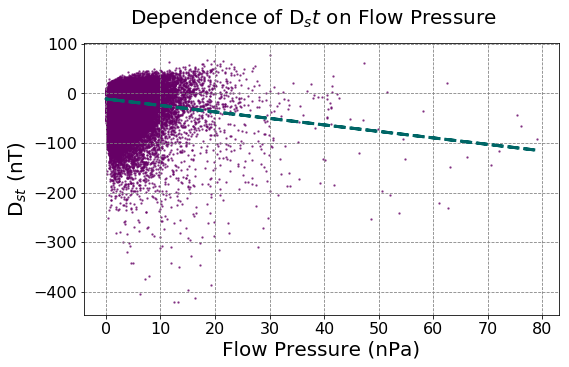

In [16]:
#since this doesn't work on nan values first we remove all potential nans' 
nanMask = ((~np.isnan(hourlyOmni['FlowPressure'])) & 
           (~np.isnan(hourlyOmni['Dst'])))

xVals = hourlyOmni.loc[nanMask, 'FlowPressure']
yVals = hourlyOmni.loc[nanMask, 'Dst']

slopeOrig, interceptOrig, rvalOrig, pvalOrig, stderrOrig = stats.linregress(xVals, yVals)

#calculate the yvalues given the linear fit
yModelOrig = interceptOrig + slopeOrig * xVals


#find y errors
RMSE  = lr.calcRMSE(yModelOrig, yVals)

#error on coefficents, slope and y-intercept and.
errSlope,  errInter = lr.calcCoeffsErr(xVals,  RMSE)


#print out fit report - 
print("Fit Report: \n \tUncert. on Y: +/- {:.2f}".format(RMSE) + 
      "\n \tIntercept: {:.2f} +/- {:.2f}".format(interceptOrig, errInter)
      + "\n\tSlope: {:.2f} +/- {:.2f}".format(slopeOrig, errSlope) 
      + "\n\tPearson Linear Correlation: {:.2f}".format(rvalOrig))



fig = plt.figure(figsize=(8.5, 5))
fig.suptitle('Dependence of D$_st$ on Flow Pressure', fontsize=20)

gs  = plt.GridSpec(1, 1, hspace=0.0, wspace=0.2, right = 0.9)

#add subplots
ax1 = fig.add_subplot(gs[0,0])

#set up titles for axis
ax1.set_xlabel('Flow Pressure (nPa)', fontsize = 20)
ax1.set_ylabel('D$_{st}$ (nT)', fontsize = 20)

#plot values
ax1.scatter(xVals, yVals,  color = '#660066', alpha = 0.6, s = 2)
ax1.plot(xVals, yModelOrig, color = '#006666', alpha = 1.0, linestyle = '--', lw = 3)

#set up grid
ax1.grid(color='gray', linestyle='dashed')

#how to set up a share axis with alternative colors
ax1.tick_params(labelsize = 16)


### But what is the estimation on the correlation coefficent? Here we need to set up our bootstrap analysis.

### Bootstrap Method:

In [17]:
#we want to resample our Pandas dataframe for the two columns of x and y. 


#.sample is a method of dataframes - 

#the commands frac means 100% of the dataframe we want in the sampling
reSamped = hourlyOmni[['FlowPressure', 'Dst']].sample(frac = 1, replace = True)

#print out the .head of resamped here - what do you think .sample does on a dataframe?

print(reSamped.head())


                     FlowPressure  Dst
Datetime                              
2008-11-13 21:00:00          1.26   -1
1980-11-26 20:00:00          2.47  -15
2001-12-26 16:00:00          1.99   -7
1987-05-03 03:00:00           NaN    8
1997-12-14 14:00:00          2.17    3


In [18]:
#And redo the fit for our newly resampled data frame

nanMask = ((~np.isnan(reSamped['FlowPressure'])) & 
           (~np.isnan(reSamped['Dst'])))

xVals = reSamped.loc[nanMask, 'FlowPressure']
yVals = reSamped.loc[nanMask, 'Dst']

slope, intercept, rval, pval, stderr = stats.linregress(xVals, yVals)

#calculate the yvalues given the linear fit
yModel = intercept + slope * xVals


#find y errors
RMSE  = lr.calcRMSE(yModel, yVals)

#error on coefficents, slope and y-intercept and.
errSlope,  errInter = lr.calcCoeffsErr(xVals,  RMSE)


#print out fit report - 
print("Fit Report: \n \tUncert. on Y: +/- {:.2f}".format(RMSE) + 
      "\n \tIntercept: {:.2f} +/- {:.2f}".format(intercept, errInter)
      + "\n\tSlope: {:.2f} +/- {:.2f}".format(slope, errSlope) 
      + "\n\tPearson Linear Correlation: {:.2f}".format(rval))



Fit Report: 
 	Uncert. on Y: +/- 21.53
 	Intercept: -11.03 +/- 0.06
	Slope: -1.33 +/- 0.02
	Pearson Linear Correlation: -0.12


### Implementing Repetition 

Let's put this into a loop - 

In [19]:
#let's resample and calculate the fits quite a number of times - this
#will take a while to run - be patient - 

#due to computational restraints we use 100 - as suggested in class
#500 would be more appropiate
numIterations = 200

#create dictionary of bootstrap values
bootstrapVals = {}
bootstrapVals['rVals'] = np.zeros((numIterations))
bootstrapVals['Intercepts'] = np.zeros((numIterations))
bootstrapVals['Slopes'] = np.zeros((numIterations))

for i in range(numIterations):
    
    #resample the dataframe
    reSamped = hourlyOmni[['FlowPressure', 
                           'Dst']].sample(frac = 1, replace = True)
    
    #create nan mask
    nanMask = ((~np.isnan(reSamped['FlowPressure'])) & 
           (~np.isnan(reSamped['Dst'])))

    #new values of x, and y without nans
    xVals = reSamped.loc[nanMask, 'FlowPressure']
    yVals = reSamped.loc[nanMask, 'Dst']

    #perform fit
    slope, intercept, rval, pval, stderr = stats.linregress(xVals, yVals)
    
    #and set up dictionay with the values
    bootstrapVals['rVals'][i] = rval
    
    bootstrapVals['Intercepts'][i] = intercept
    
    bootstrapVals['Slopes'][i] = slope

#print out final values
print("The mean rVal is {:.2f} with a standard deviation of {:.5f}.".format(
    np.mean(bootstrapVals['rVals']), 
    np.std(bootstrapVals['rVals'], ddof = 1)))

The mean rVal is -0.12 with a standard deviation of 0.00472.


### Let's see what these fits look like - 

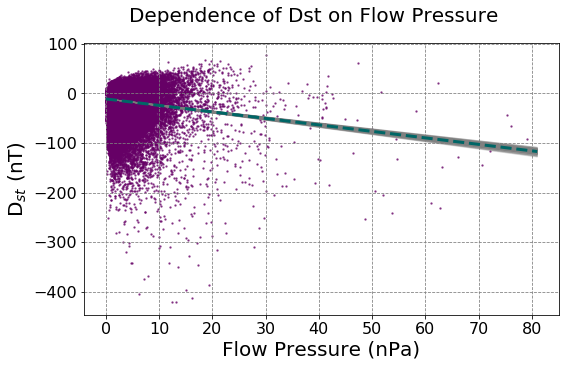

In [20]:
fig = plt.figure(figsize=(8.5, 5))
fig.suptitle('Dependence of Dst on Flow Pressure', fontsize=20)

gs  = plt.GridSpec(1, 1, hspace=0.0, wspace=0.2, right = 0.9)

#add subplots
ax1 = fig.add_subplot(gs[0,0])

#set up titles for axis
ax1.set_xlabel('Flow Pressure (nPa)', fontsize = 20)
ax1.set_ylabel('D$_{st}$ (nT)', fontsize = 20)

#plot values
ax1.scatter(hourlyOmni['FlowPressure'], hourlyOmni['Dst'],  
            color = '#660066', alpha = 0.6, s = 2)

#make line equally spaced
minVal  = np.nanmin(hourlyOmni['FlowPressure'])
maxVal  = np.nanmax(hourlyOmni['FlowPressure'])
spacing = (maxVal - minVal) / 20.0

#create new xarray for pretty plotting
xVals = np.arange(minVal, maxVal+spacing, int(spacing))

for slope, intercept in zip(bootstrapVals['Slopes'], bootstrapVals['Intercepts']):
    
    #calculate y values
    yModel = slope*xVals + intercept 
    
    #and plot in gray
    ax1.plot(xVals, yModel, color = 'grey', alpha = 0.2, lw = 1.0)
    
#plot final value in turquoise - 
yModelOrig = slopeOrig*xVals + interceptOrig

ax1.plot(xVals, yModelOrig, 
         color = '#006666', alpha = 1.0, linestyle = '--', lw = 3.0)


#set up grid
ax1.grid(color='gray', linestyle='dashed')

#set up label sizes
ax1.tick_params(labelsize = 16)


### What would we expect a distribution of these r values to look like? 

The number of bins for the histogram is: 15.0
Skew: -0.3, Kurtosis: 2.7, Standard Dev: 0.0, Mean: -0.1


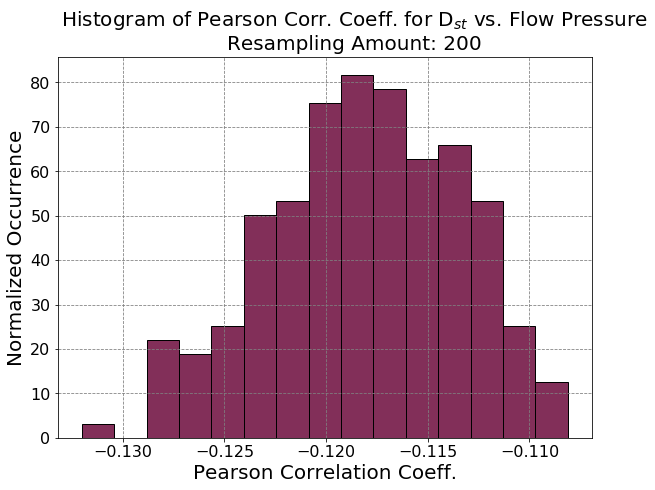

In [21]:
#what does the histogram of this look like? 

#set up the figure 
fig = plt.figure(figsize=(11, 7))
fig.suptitle('Histogram of Pearson Corr. Coeff. for D$_{st}$ vs. Flow Pressure \n' + 
             'Resampling Amount: {}'.format(numIterations), 
             fontsize=20)

gs = plt.GridSpec(1, 1, hspace=0.2, wspace=0.0, right = 0.8)

#add subplots
ax1 = fig.add_subplot(gs[0,0])

#calculate using the general rule of thumb - 

#minimum as the sqrt(sampleSize)
sampleSize = len(bootstrapVals['rVals'])

#could also use np.floor - both find the integer 
# - ceil rounds up and I want MORE bins than
#minimum

numBins = np.ceil(np.sqrt(sampleSize))
print("The number of bins for the histogram is: {}".format(numBins))

#values is first entry, followed by number of bins, normed is the
#normalization factor, ie normalize to 1. 

#edgecolor and linewidth set up the bin edges
ax1.hist(bootstrapVals['rVals'], int(numBins), density = 1, facecolor = '#822f59', 
         edgecolor="k")

#set up grid
plt.grid(color='gray', linestyle='dashed')

#labels
plt.xlabel('Pearson Correlation Coeff.', fontsize = 20)
plt.ylabel('Normalized Occurrence', fontsize = 20)
#large ticks
plt.xticks(fontsize=16) #make the xaxis labels larger
plt.yticks(fontsize=16) #make the yaxis labels larger

#print out stats on the skew etc
print("Skew: {:.1f}, Kurtosis: {:.1f}, Standard Dev: {:.1f}, Mean: {:.1f}".format(
        skew(bootstrapVals['rVals']), 
        kurtosis(bootstrapVals['rVals'], fisher = False), 
        np.std(bootstrapVals['rVals'], ddof = 1), 
        np.mean(bootstrapVals['rVals'])))

### What does this chart inform you about the bootstrap analysis?

In [22]:
#how does the t value look?
tVal = (abs((rvalOrig - np.mean(bootstrapVals['rVals']))) / 
        (np.std(bootstrapVals['rVals'], ddof = 1)))
print("The t-test results in a comparison" + 
      " of the original fit to the bootstrap fit of {:.5f}.".format(tVal))

The t-test results in a comparison of the original fit to the bootstrap fit of 0.04435.


## *Part 3 - Now With More Explicit Object Oriented*

Within this section you can see section 2 repeated but by now taking advantage of a 
new object called omni which we define in the omni.py file - 

In [23]:
importlib.reload(omni)


#create a new instance of the object - 
exampleObj = omni.Omni(hourlyOmni['FlowPressure'], hourlyOmni['Dst'], 
                          xLabel = 'Flow Pressure (nPa)', 
                          yLabel = 'D$_{st}$ (nT)')

print(type(exampleObj))


<class 'omni.Omni'>


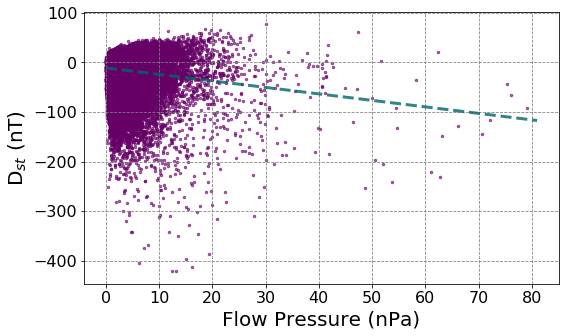

In [24]:
# plot out the linear fit
exampleObj.plotLinReg()


In [25]:
# print out fit report as a method of the object
exampleObj.printFitReport()


Fit Report: 
 	Uncert. on Y: +/- 21.44
 	Intercept: -10.99 +/- 0.06
	Slope: -1.31 +/- 0.02
	Pearson Linear Correlation: -0.12


### Now let's resample and calculate the fits a number of times.



In [26]:
#resample and calculate the fits quite a number of times - to clean
#up the process from before we wrote a bootstrap function - 

importlib.reload(bootstrap)

#given the original data and fit, run a boostrap analysis and output
#a dictionary of values of those fits
bVals = bootstrap.bootstrap(exampleObj, numIterations = 50)

The number of bins for the histogram is: 8.0
Skew: -0.3, Kurtosis: 2.5, Standard Dev: 0.0, Mean: -0.1


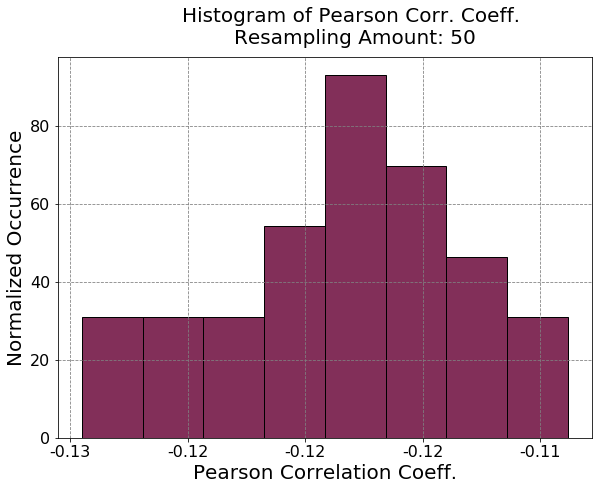

In [27]:
#take a look at the histogram of the rValues
bootstrap.plotRValsHist(exampleObj, bVals)


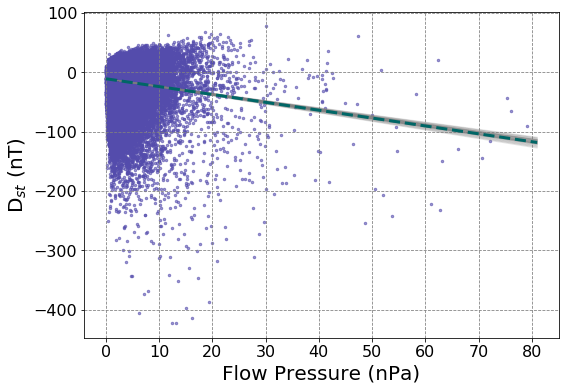

In [28]:
# plot the final fits given these bootstrap 
bootstrap.plotFits(exampleObj, bVals)


In [29]:
# and the fit report - 
bootstrap.printFitReport(exampleObj, bVals)

Fit Report: 
 	Uncert. on Y: +/- 21.44
 	Intercept: -10.99 +/- 0.06
	Slope: -1.31 +/- 0.02
	Pearson Linear Correlation: -0.12 +/- 0.00507


## *Part 4 - In the below section we try a different grouping of data*

Below I've outlined the steps with an example for creating an object omni and then running the bootstrap functions. See what you can create with other columns of data!




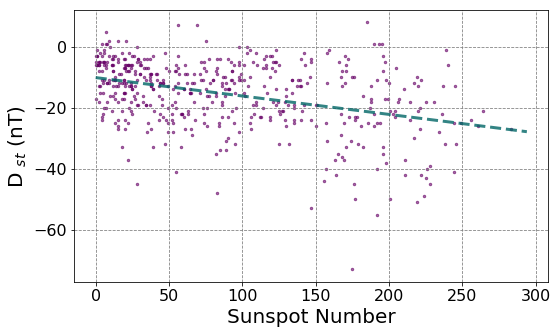

In [30]:
#create a new instance of the object - 

corrSunDst = omni.Omni(monthlyOmni['SunspotNumber'], monthlyOmni['Dst'], 
                          xLabel = 'Sunspot Number', 
                          yLabel = 'D $_{st}$ (nT)')

#Calculate linear regression - 
corrSunDst.plotLinReg()


The number of bins for the histogram is: 23.0
Skew: 0.2, Kurtosis: 2.9, Standard Dev: 0.0, Mean: -0.4


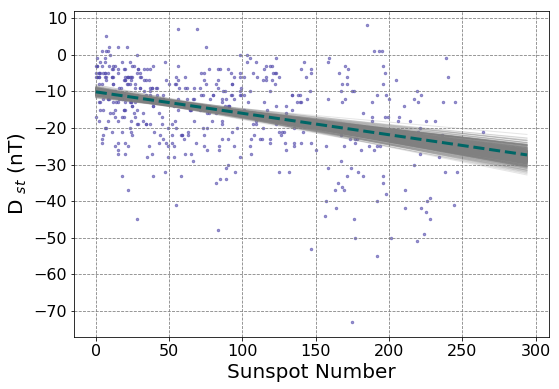

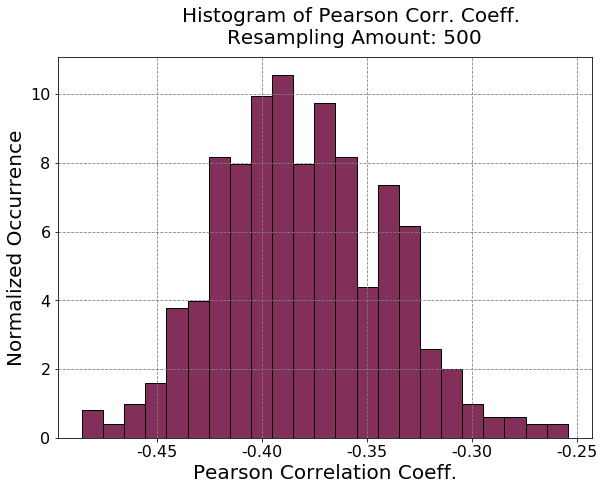

In [31]:
#Run bootstrap
bVals = bootstrap.bootstrap(corrSunDst, numIterations = 500)

#Plot bootstrap
bootstrap.plotFits(corrSunDst, bVals)

#Plot Histogram of Values
bootstrap.plotRValsHist(corrSunDst, bVals)


plt.savefig("BootStrap.png")

In [32]:
bootstrap.printFitReport(corrSunDst, bVals)

Fit Report: 
 	Uncert. on Y: +/- 10.21
 	Intercept: -10.11 +/- 0.72
	Slope: -0.06 +/- 0.01
	Pearson Linear Correlation: -0.38 +/- 0.03997


# SUMMARY

Learned to code with object oriented programming as well as how to start a bootstrap method. 

